# Algerian Forest Model
- This project focuses on analyzing and predicting various outcomes using machine learning models on a travel dataset. The goal is to build models that can effectively predict certain travel-related features based on other available data.
- This dataset from Kaggle.com: https://www.kaggle.com/datasets/nitinchoudhary012/algerian-forest-fires-dataset


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [49]:
df['year'].value_counts()

year
2012    244
year      1
Name: count, dtype: int64

In [50]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [51]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [52]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'temperature', ' rh', ' ws', 'rain ', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes  '],
      dtype='object')

### Data Cleaning
- Imputing the missing values
- Removing duplicates
- checking for the column names fixing them
- removing unecessary columns

In [53]:
df.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [54]:
df.columns

Index(['day', 'month', 'year', 'temperature', ' rh', ' ws', 'rain ', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes  '],
      dtype='object')

In [55]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes'],
      dtype='object')

In [56]:
# Checking for null
df[df.isnull().any(axis=1)]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [57]:
df.loc[:123, "region"] = 0
df.loc[123:, 'region'] = 1

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   temperature  245 non-null    object 
 4   rh           245 non-null    object 
 5   ws           245 non-null    object 
 6   rain         245 non-null    object 
 7   ffmc         245 non-null    object 
 8   dmc          245 non-null    object 
 9   dc           245 non-null    object 
 10  isi          245 non-null    object 
 11  bui          245 non-null    object 
 12  fwi          245 non-null    object 
 13  classes      244 non-null    object 
 14  region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [59]:
# Checking for null
df[df.isnull().any(axis=1)]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [60]:
df['region'] = df['region'].astype(int)

In [61]:
df = df.dropna().reset_index(drop=True)

In [62]:
df.isnull().sum()

day            0
month          0
year           0
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             0
isi            0
bui            0
fwi            0
classes        0
region         0
dtype: int64

In [63]:
df = df.drop(122).reset_index(drop=True)

In [64]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [65]:
df[['day', 'month', 'year', 'temperature', 'rh', 'ws']] = df[['day', 'month', 'year', 'temperature', 'rh', 'ws']].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   temperature  243 non-null    int64 
 4   rh           243 non-null    int64 
 5   ws           243 non-null    int64 
 6   rain         243 non-null    object
 7   ffmc         243 non-null    object
 8   dmc          243 non-null    object
 9   dc           243 non-null    object
 10  isi          243 non-null    object
 11  bui          243 non-null    object
 12  fwi          243 non-null    object
 13  classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [67]:
# Converting the object values to as type float
objects = [feature for feature in df.columns if df[feature].dtype == "O"]
for object in objects:
      if object != 'classes':
            df[object] = df[object].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


# Exploratory Data Analysis

In [69]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [70]:
df_copy.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [71]:
print(df_copy['classes'].value_counts())
df_copy['classes'].unique()

classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [72]:
# Converting all the classes of 'not fire' into on and fire into one
df_copy['classes'] = np.where(df_copy['classes'].str.contains('not fire'), 0, 1)
df_copy['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [73]:
df_copy.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


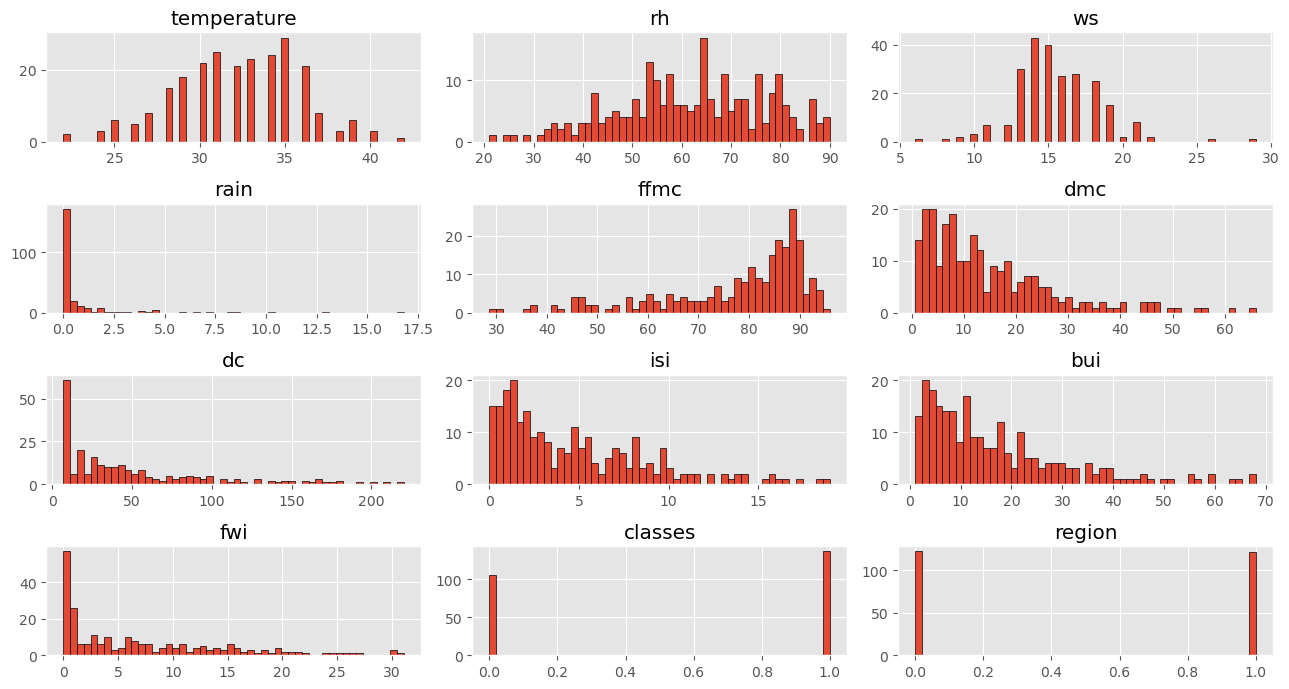

In [74]:
df_copy.hist(bins=50, figsize=(13,7), edgecolor='black')
plt.tight_layout()
plt.show()

In [75]:
percentage = np.round(df_copy['classes'].value_counts(normalize=True)*100)

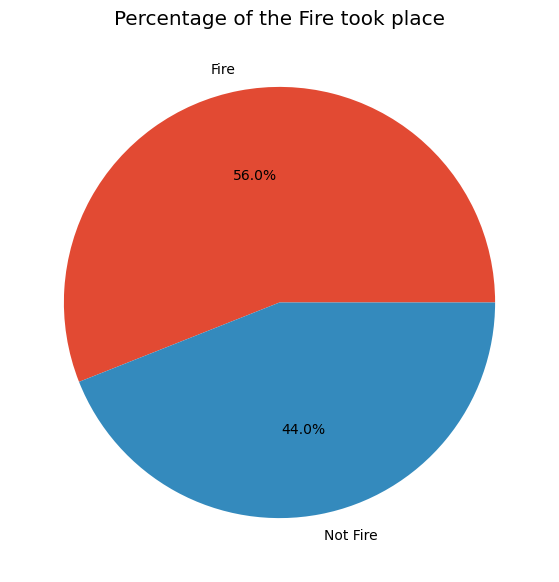

In [76]:
classable = ['Fire', 'Not Fire']
plt.figure(figsize=(10,7))
plt.pie(percentage, labels=classable, autopct='%1.1f%%')
plt.title('Percentage of the Fire took place')
plt.show()

In [77]:
# Correlation
df_copy.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


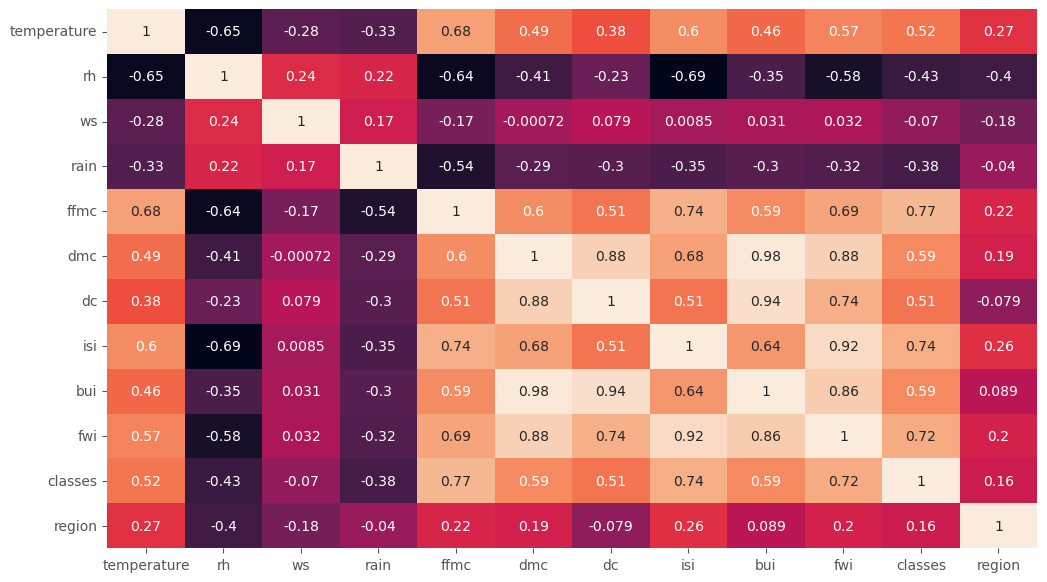

In [78]:
# Heat map
plt.figure(figsize=(12,7))
sns.heatmap(df_copy.corr(), annot=True, cbar=False)
plt.show()

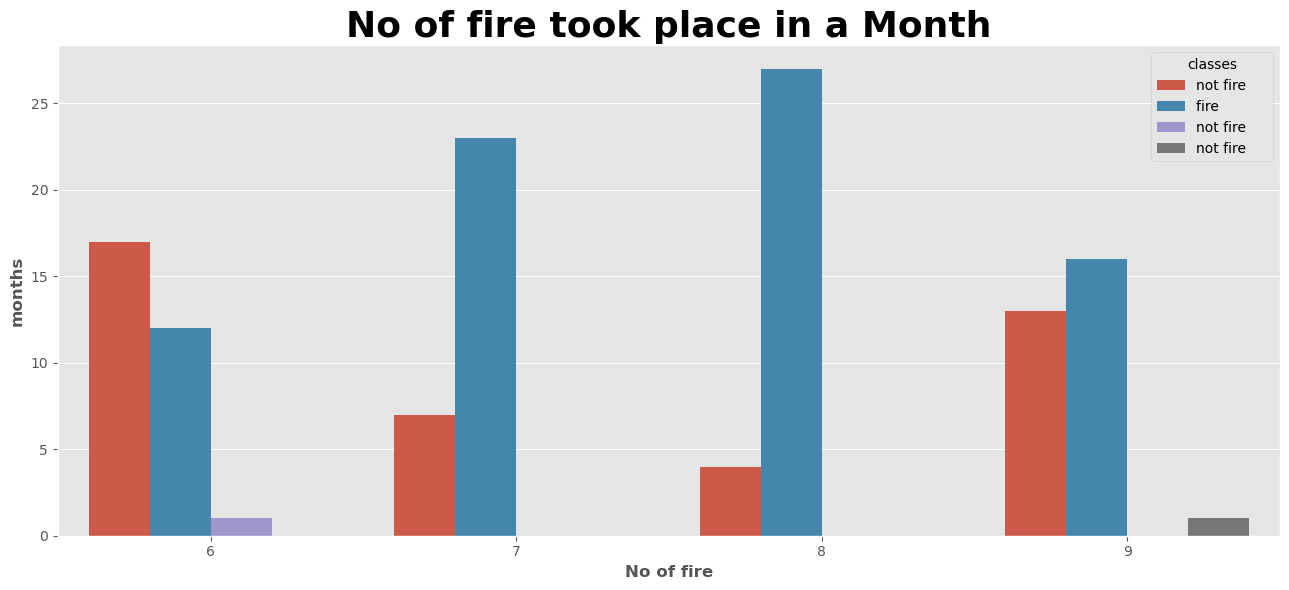

In [79]:
# Monthly fire Analysis
dftemp = df[df['region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(x='month', data=dftemp, hue='classes')
plt.title('No of fire took place in a Month', weight='bold', fontsize=26)
plt.xlabel('No of fire', weight='bold')
plt.ylabel('months', weight='bold')
plt.tight_layout()
plt.show()

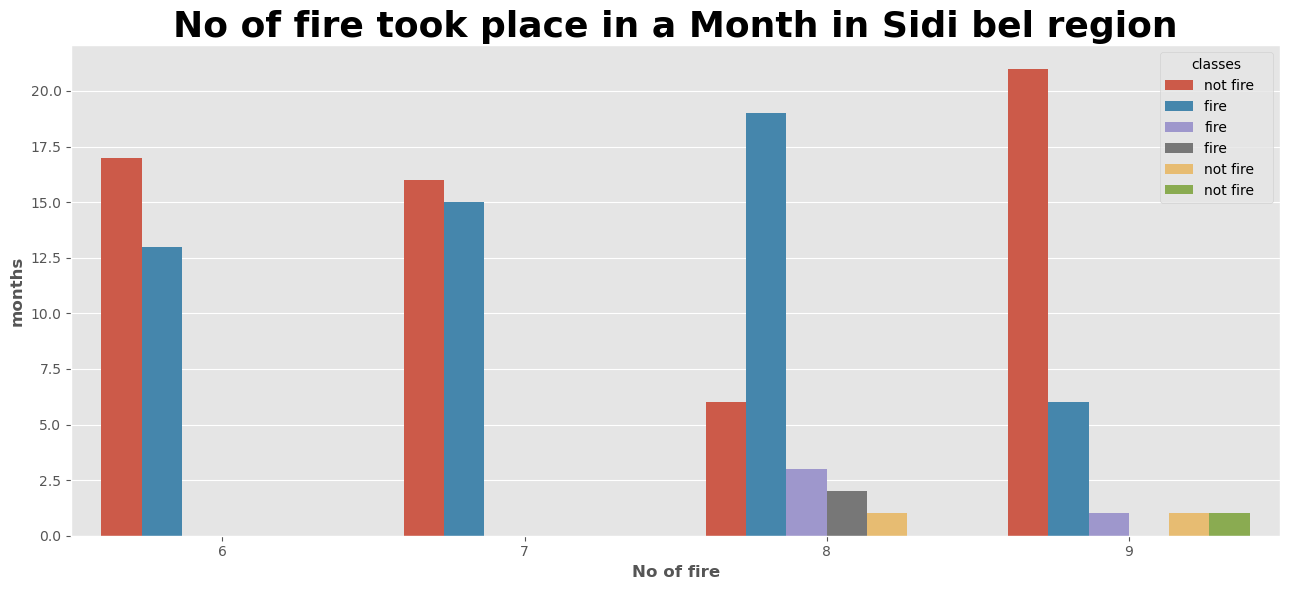

In [80]:
# Monthly fire Analysis
dftemp = df[df['region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(x='month', data=dftemp, hue='classes')
plt.title('No of fire took place in a Month in Sidi bel region', weight='bold', fontsize=26)
plt.xlabel('No of fire', weight='bold')
plt.ylabel('months', weight='bold')
plt.tight_layout()
plt.show()

# Analysis of Algerian forest:
- we can clearly see the sidi bell region the mostly fire took place in October month at 2012.
- And in other region it's varing bw july to october.

# Splitting the dataset
- splitting the dataset into X_train and y_train

In [86]:
df_copy.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [91]:
X = df_copy.drop('fwi', axis=1)
y = df_copy['fwi']

In [92]:
X.shape, y.shape

((243, 11), (243,))

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42) 

In [105]:
X_train.corr()

,temperature,rh,ws,rain,ffmc,dmc,isi,classes,region
temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.600649,0.515616,0.260966
rh,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.718725,-0.444497,-0.419498
ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,-0.006136,-0.062682,-0.216375
rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.340753,-0.366668,-0.057620
ffmc,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.748319,0.782922,0.271324
dmc,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.685568,0.617266,0.222615
isi,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,1.000000,0.733342,0.304554
classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.733342,1.000000,0.197291
region,0.260966,-0.419498,-0.216375,-0.057620,0.271324,0.222615,0.304554,0.197291,1.000000


In [100]:
# Removing the highest correlation columns from the dataset
def correlation(dataset, threshold):
      col_name = set()
      corr_matrix = dataset.corr()
      for i in range(len(corr_matrix.columns)):
            for j in range(i):
                  if abs(corr_matrix.iloc[i,j])> threshold:
                        colname = corr_matrix.columns[i]
                        col_name.add(colname)
      return col_name

In [101]:
corr_columns = correlation(X_train, 0.85)
corr_columns

{'bui', 'dc'}

In [102]:
# Dropping those two columns which is hightly correlated
X_train.drop(corr_columns, axis=1, inplace=True)
X_test.drop(corr_columns, axis=1, inplace=True)

In [104]:
X_train.shape, X_test.shape

((162, 9), (81, 9))

# Applying the Standard Scaler, and lasso regression with Redige regression
- In this mode we'll be using 3 transformer so we need to use a column transformer which will act as our pipeline.
- we'll be seeing the MAE, MSE, r2 score

In [109]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
models = {
      'Linear Regression': LinearRegression(),
      'Lasso': Lasso(),
      'Ridge': Ridge()
}

model_performance = {}

for model_name, model in models.items():
      # Creating pipeline for the models
      pipeline = Pipeline([
            ('scaler',StandardScaler()),
            (model_name, model)
      ])
      # Fitting the models
      pipeline.fit(X_train, y_train)
      # Predicting the models
      y_pred = pipeline.predict(X_test)

      # Calculating the evaluation matrix
      mae = mean_absolute_error(y_test, y_pred)
      score = r2_score(y_test, y_pred)

      model_performance[model_name] = {
        'Mean Absolute Error': mae,
        'R2 Score': score,
      }

for model_name, performance in model_performance.items():
      print(f"---------------- {model_name} ----------------")
      print(f"Mean Absolute Error: {performance['Mean Absolute Error']}")
      print(f"R2 Score: {performance['R2 Score']}")

---------------- Linear Regression ----------------
Mean Absolute Error: 0.5767877823415967
R2 Score: 0.9845563190792226
---------------- Lasso ----------------
Mean Absolute Error: 1.1053469612945104
R2 Score: 0.9514102148198663
---------------- Ridge ----------------
Mean Absolute Error: 0.5953582907340875
R2 Score: 0.9839564989246833


# Applying the lasso cv and ridge cv
- Applying cross validation method for the lasso and ridge to get the best alpha value

In [110]:
from sklearn.linear_model import LassoCV, RidgeCV

models = {
      "LassoCV": LassoCV(cv=5, random_state=42),
      "RidgeCV": RidgeCV(cv=5)
}
model_performance = {}

for model_name, model in models.items():
      # Creating pipeline for the models
      pipeline = Pipeline([
            ("scaler", StandardScaler()),
            (model_name, model)
      ])
      # Fitting the pipline to the model
      pipeline.fit(X_train, y_train)
      # predicting the models
      y_pred_cv = pipeline.predict(X_test)

      # Calculate evaluation metrics
      mae = mean_absolute_error(y_test, y_pred_cv)
      r2 = r2_score(y_test, y_pred_cv)

      model_performance[model_name] = {
        'Mean Absolute Error': mae,
        'R2 Score': r2,
        'Best Alpha': model.alpha_
    }

# Print the comparison results for each model
for model_name, performance in model_performance.items():
    print(f"---------------- {model_name} ----------------")
    print(f"Mean Absolute Error: {performance['Mean Absolute Error']}")
    print(f"R2 Score: {performance['R2 Score']}")
    print(f"Best Alpha: {performance['Best Alpha']}")
    print("-" * 50)

---------------- LassoCV ----------------
Mean Absolute Error: 0.6041813665539072
R2 Score: 0.983629786213086
Best Alpha: 0.03318346689607894
--------------------------------------------------
---------------- RidgeCV ----------------
Mean Absolute Error: 0.5953582907340875
R2 Score: 0.9839564989246833
Best Alpha: 1.0
--------------------------------------------------


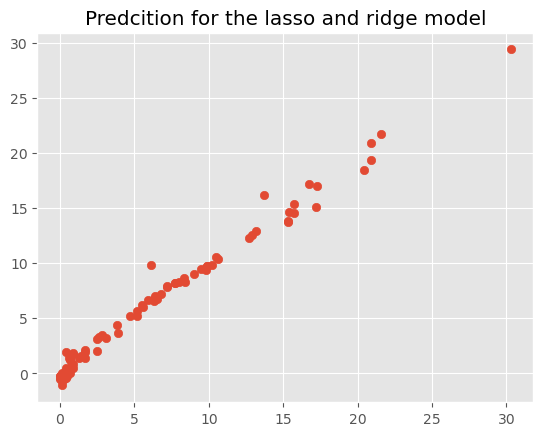

In [111]:
plt.scatter(y_test, y_pred)
plt.title('Predcition for the lasso and ridge model')
plt.show()

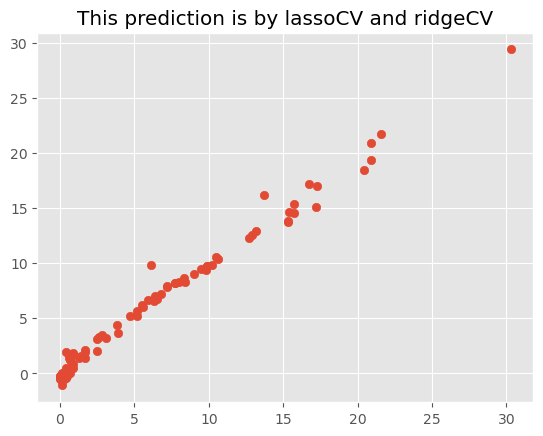

In [112]:
plt.scatter(y_test, y_pred_cv)
plt.title('This prediction is by lassoCV and ridgeCV')
plt.show()

# Thank you